預測趨勢依Close Price做評估

參考資料:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://keras.io/models/sequential/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random
from keras import models, layers, optimizers, regularizers
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm
from sklearn import datasets

Using TensorFlow backend.


In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [4]:
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


In [5]:
test_data.isnull().sum()

Date           0
Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
dtype: int64

In [6]:
train_data.isnull().sum()

Date           0
Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
dtype: int64

資料沒有遺漏值，不需做遺漏值填補

In [7]:
test_data = test_data.drop(columns = "Date")
train_data = train_data.drop(columns = "Date")

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 5 columns):
Open Price     2264 non-null float64
Close Price    2264 non-null float64
High Price     2264 non-null float64
Low Price      2264 non-null float64
Volume         2264 non-null int64
dtypes: float64(4), int64(1)
memory usage: 88.5 KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
Open Price     252 non-null float64
Close Price    252 non-null float64
High Price     252 non-null float64
Low Price      252 non-null float64
Volume         252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 9.9 KB


In [10]:
def split(train_data, test_data):
    x_train = train_data.loc[:, train_data.columns != 'Close Price']
    y_train = train_data['Close Price']
    x_test = test_data.loc[:, test_data.columns != 'Close Price']
    y_test = test_data['Close Price']
    return x_train, y_train, x_test, y_test

In [11]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['Close Price'])
    plt.xlabel(feature_name)
    plt.ylabel('Close Price')
    plt.show()

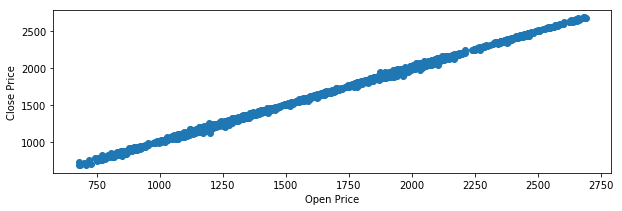

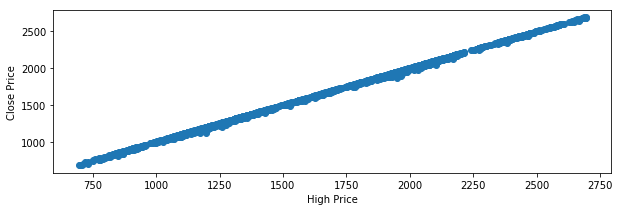

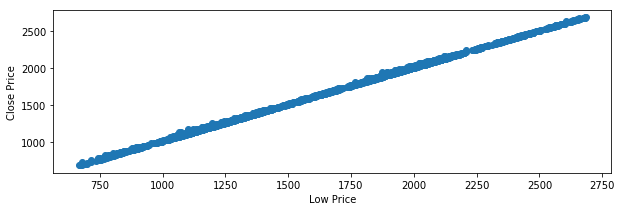

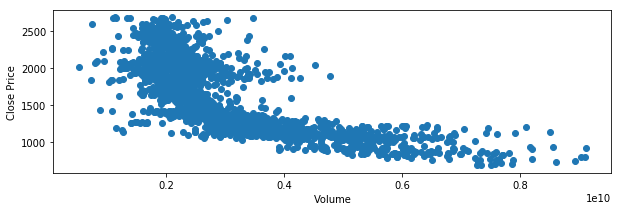

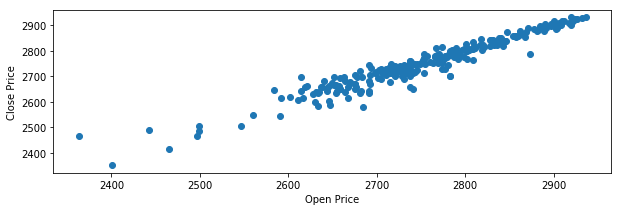

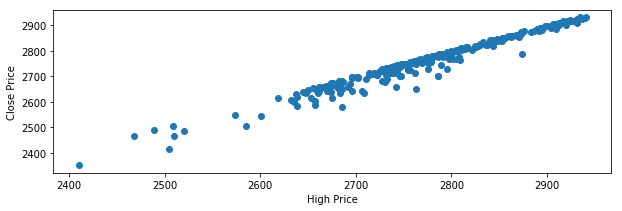

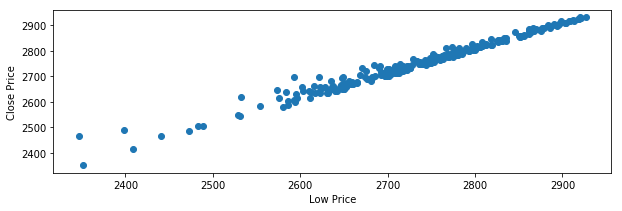

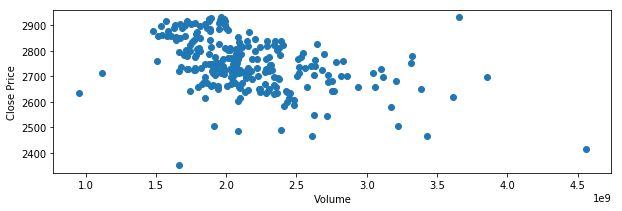

In [12]:
#Open Price	Close Price	High Price	Low Price	Volume
plot_feature(train_data, 'Open Price')
plot_feature(train_data, 'High Price')
plot_feature(train_data, 'Low Price')
plot_feature(train_data, 'Volume')
plot_feature(test_data, 'Open Price')
plot_feature(test_data, 'High Price')
plot_feature(test_data, 'Low Price')
plot_feature(test_data, 'Volume')

In [13]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

## Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
x_train, y_train, x_test, y_test = split(train_data, test_data)
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(x_train.astype('int'), y_train.astype('int'))
evaluate(clf, x_train.astype('int'), y_train.astype('int'), x_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.004858657243816254
Test accuracy: 0.0


In [45]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(x_train.round(), y_train.round())
evaluate(clf, x_train.round(), y_train.round(), x_test.round(), y_test.round())

Train accuracy: 0.0030918727915194345
Test accuracy: 0.0


In [98]:
z_train = x_train.drop(columns = "Low Price")
z_test = x_test.drop(columns = "Low Price")

In [72]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.0030918727915194345
Test accuracy: 0.0


In [99]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.astype('int'), y_train.astype('int'))
evaluate(clf, z_train.astype('int'), y_train.astype('int'), z_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.004858657243816254
Test accuracy: 0.0


In [58]:
z_train = x_train.drop(columns = "High Price")
z_test = x_test.drop(columns = "High Price")

In [59]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.0030918727915194345
Test accuracy: 0.0


In [60]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")

In [61]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.0030918727915194345
Test accuracy: 0.0


In [81]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")
z_train = z_train.drop(columns = "Low Price")
z_test = z_test.drop(columns = "Low Price")

In [82]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.0030918727915194345
Test accuracy: 0.0


In [100]:
z_train = x_train.drop(columns = "Volume")
z_test = x_test.drop(columns = "Volume")

In [66]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

C:\Users\yj_li\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Train accuracy: 0.008392226148409895
Test accuracy: 0.0


In [102]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.astype('int'), y_train.astype('int'))
evaluate(clf, z_train.astype('int'), y_train.astype('int'), z_test.astype('int'), y_test.astype('int'))

C:\Users\yj_li\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Train accuracy: 0.009717314487632508
Test accuracy: 0.0


各欄位直接去掉小數的Train accuracy較四捨五入的高。

嘗試過丟掉各項欄位，accuracy幾乎沒變動，除了丟掉Volume這個欄位，Train accuracy accuracy會上升但是結果不收斂。

增加跌代次數，前面有收斂的模型皆不影響accuracy，

去掉Volume 迭代200 Train accuracy: 0.011484098939929329 (不收斂)

迭代300 Train accuracy: 0.013692579505300354 (最高結果但不收斂)
       
迭代400 Train accuracy: 0.009275618374558304 (不收斂)
       
以上結果Test accuracy皆為0.0

## SVM

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train.astype('float'))

x_train_std = scaler.transform(x_train.astype('float'))
x_test_std = scaler.transform(x_test.astype('float'))

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [89]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear").fit(x_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(x_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(x_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 0.71 %, Test accuracy = 0.00 %


In [93]:
z_train = x_train.drop(columns = "Low Price")
z_test = x_test.drop(columns = "Low Price")

In [96]:
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [97]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 0.49 %, Test accuracy = 0.00 %


In [106]:
z_train = x_train.drop(columns = "High Price")
z_test = x_test.drop(columns = "High Price")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [107]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 0.53 %, Test accuracy = 0.00 %


In [108]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [109]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 0.49 %, Test accuracy = 0.00 %


In [110]:
z_train = x_train.drop(columns = "Volume")
z_test = x_test.drop(columns = "Volume")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [111]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 0.80 %, Test accuracy = 0.00 %


丟入參數直接捨棄小數位的Train accuracy較四捨五入高。

除了Volume以外的欄位丟掉所跑出來的Train accuracy皆比原本低，本項最高為丟掉Volume後的Train accuracy = 0.80 %。

## Neural Network

In [112]:
nx_train = preprocessing.normalize(x_train)
nx_test = preprocessing.normalize(x_test)

In [167]:
hidden_units = 20    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 100      # how many samples to use for each gradient descent update

In [195]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=4,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [196]:
# train the parameters
history = model.fit(nx_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test,y_test), class_weight="balance")

# evaluate accuracy
train_acc = model.evaluate(nx_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(nx_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Train on 2264 samples, validate on 252 samples
Epoch 1/10
2264/2264 [==============================] - ETA: 31s - loss: -278.1015 - acc: 0.0000e+0 - ETA: 0s - loss: -15756.6364 - acc: 0.0000e+ - 2s 768us/step - loss: -18901.8602 - acc: 0.0000e+00 - val_loss: -43762.3397 - val_acc: 0.0000e+00
Epoch 2/10
2264/2264 [==============================] - ETA: 0s - loss: -26565.2344 - acc: 0.0000e+ - ETA: 0s - loss: -26454.6253 - acc: 0.0000e+ - 0s 34us/step - loss: -26396.8830 - acc: 0.0000e+00 - val_loss: -43762.3397 - val_acc: 0.0000e+00
Epoch 3/10
2264/2264 [==============================] - ETA: 0s - loss: -24858.1309 - acc: 0.0000e+ - ETA: 0s - loss: -26259.8567 - acc: 0.0000e+ - 0s 36us/step - loss: -26396.8829 - acc: 0.0000e+00 - val_loss: -43762.3397 - val_acc: 0.0000e+00
Epoch 4/10
2264/2264 [==============================] - ETA: 0s - loss: -25891.0195 - acc: 0.0000e+ - ETA: 0s - loss: -26685.3122 - acc: 0.0000e+ - 0s 41us/step - loss: -26396.8834 - acc: 0.0000e+00 - val_loss: -43762

In [197]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight="balance", 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [198]:
_, test_accs = train_and_evaluate(model, nx_train, y_train, nx_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.03s/it]


Avgerage Training Accuracy: 0.0
Avgerage Testing Accuracy: 0.0


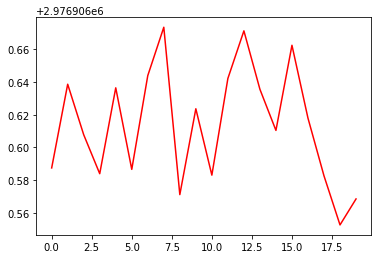

In [188]:
history = model.fit(
    nx_train, y_train, epochs=epochs, batch_size=batch_size, 
    class_weight="balance", verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

neural network會Overfitting，對於股市這種完全沒規則的波動不適用

先查看資料型態以及填補遺漏值，做SVM前先把資料做標準化，做Neural Network前，把資料做normal。

本次預測結果Testing Accuracy皆為0，而使用SVM對初始資料所得的Training Accuracy為最高值。

SVM跑的時間會比Logistic Regression久，SVM較Logistic Regression有彈性，

若資料型態不同，則跑出來的結果也會不同。

而經過調整後，丟棄Volume欄位(看圖形這類資料較分散)的Logistic Regression的Training Accuracy有更高的預測率。
